In [1]:
!python -V

Python 3.9.19


In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?


Read the data for January

In [6]:
df = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

There are 19 columns in the dataset

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

Calculate the duration of a trip and get the standard deviation

In [7]:
# Calculate the duration in a new column
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
# Convert to minutes
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


Get the standard deviation of the duration

In [8]:
duration_stddev= df['duration'].std()
print("Standard deviation for Duration: ",duration_stddev)

Standard deviation for Duration:  42.59435124195458


The Standard deviation for Duration:  42.59435124195458

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).


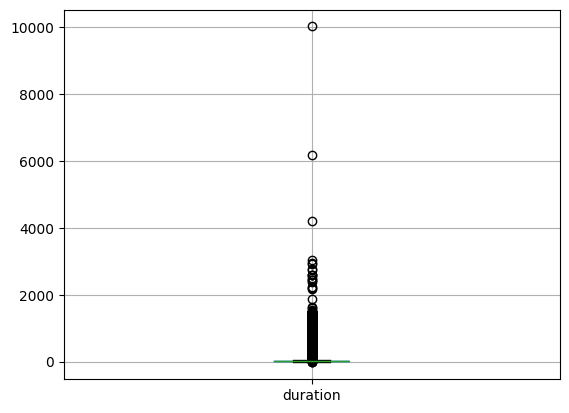

In [9]:
boxplot = df.boxplot(column="duration")

In [9]:
# Remove outliers
initial_length=len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
# Show the answers
print("Initial records: ", initial_length)
print("Records left: ", len(df))
print("Fraction Left: ", len(df)/initial_length)

Initial records:  3066766
Records left:  3009173
Fraction Left:  0.9812202822125979


In [14]:
print("% left:", str((len(df_nooutliers)/len(df))*100))

% left: 98.27547930522405


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will 
  label encode them)
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [10]:
# Set the categorical variables we'll consider
categorical = ['PULocationID', 'DOLocationID']

# Re-cast the ids to strings - otherwise it will label encode them
df[categorical] = df[categorical].astype(str)
# Turn to a lists of dictionaries
train_dicts = df[categorical].to_dict(orient='records')
# Create a DictVectorizer and fit the variables
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [11]:
# Check the dimension of our sparse feature matrix
print("Dimension of the feature matrix: ", X_train.shape)

Dimension of the feature matrix:  (3009173, 515)


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?


Check if your current installed version includes `root_mean_squared_error`, if not, you will need to update scikit-learn package.

In [24]:
!pip install scikit-learn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.9 MB/s eta 0:00:000m eta 0:00:0101:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [12]:
from sklearn.metrics import root_mean_squared_error

Prepare the data for our model and train the model

In [17]:
# We only train based on the Locations ID
X_train.shape

(3009173, 515)

In [13]:
# Extract the labels
target = 'duration'
y_train = df[target].values

# Create a linear regressor with default parameters
lr = LinearRegression()
# Train the regressor
lr.fit(X_train, y_train)
# Get the predictions
y_pred = lr.predict(X_train)
# Calculate the RSMEW metric for the actual labels
root_mean_squared_error(y_train, y_pred)

7.649261932106969

The RMSE is 7.64

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023). 

What's the RMSE on validation?


Define a function to read the validation dataframe

In [14]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
        
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    # Calculate the duration in a new column
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    # Convert to minutes
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

Data from February will be for evaluation

In [15]:
#df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('../data/yellow_tripdata_2023-02.parquet')

In [16]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855951 entries, 0 to 2913954
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [22]:
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


Prepare validation data

In [17]:
categorical

['PULocationID', 'DOLocationID']

Apply feature transformations on the validation dataset

In [18]:
# Apply the same transformation that were applied to the training dataset
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

Check the dimension to compare with the training data

In [26]:
print(X_val.shape)

(2855951, 515)


Get the ground truth for the validation dataset

In [19]:
target = 'duration'
y_val = df_val[target].values
print("Length validation labels: ", y_val.shape)

Length validation labels:  (2855951,)


Evaluate the model on the validation dataset

In [20]:
# Get predictions for validation features
y_pred = lr.predict(X_val)
# Calculate the RMSE
root_mean_squared_error(y_val, y_pred)


7.811818743246608

RMSE for validation dataset is 7.81

## Plot predictions vs actual labels

In [31]:
%matplotlib inline

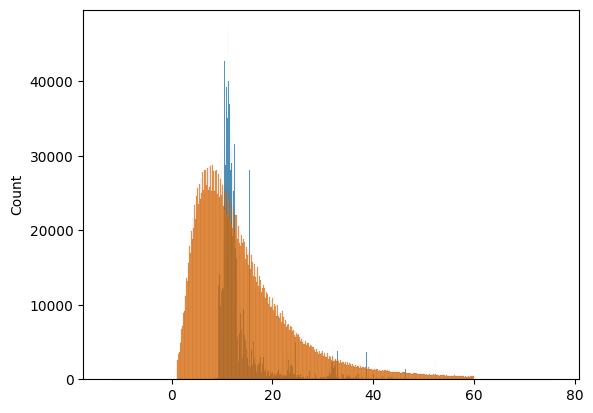

In [35]:
#sns.displot(y_pred, label='prediction')
#sns.displot(y_val, label='actual')

sns.histplot(y_pred, label='prediction', legend=True)
sns.histplot(y_val, label='actual', legend=True)

#plt.legend()
plt.show()